# Using Reddit's API for Predicting Comments

In this project, we will practice two major skills. Collecting data via an API request and then building a binary predictor.

As we discussed in week 2, and earlier today, there are two components to starting a data science problem: the problem statement, and acquiring the data.

For this article, your problem statement will be: _What characteristics of a post on Reddit contribute most to the overall interaction (as measured by number of comments)?_

Your method for acquiring the data will be scraping the 'hot' threads as listed on the [Reddit homepage](https://www.reddit.com/). You'll acquire _AT LEAST FOUR_ pieces of information about each thread:
1. The title of the thread
2. The subreddit that the thread corresponds to
3. The length of time it has been up on Reddit
4. The number of comments on the thread

Once you've got the data, you will build a classification model that, using Natural Language Processing and any other relevant features, predicts whether or not a given Reddit post will have above or below the _median_ number of comments.

**BONUS PROBLEMS**
1. If creating a logistic regression, GridSearch Ridge and Lasso for this model and report the best hyperparameter values.
1. Scrape the actual text of the threads using Selenium (you'll learn about this in Webscraping II).
2. Write the actual article that you're pitching and turn it into a blog post that you host on your personal website.

### Scraping Thread Info from Reddit.com

#### Set up a request (using requests) to the URL below. 

*NOTE*: Reddit will throw a [429 error](https://httpstatuses.com/429) when using the following code:
```python
res = requests.get(URL)
```

This is because Reddit has throttled python's default user agent. You'll need to set a custom `User-agent` to get your request to work.
```python
res = requests.get(URL, headers={'User-agent': 'YOUR NAME Bot 0.1'})
```

In [309]:
import requests
import json
import time
import pandas as pd
import sklearn
from bs4 import BeautifulSoup
import datetime
from datetime import timedelta
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [68]:
t2-t1

datetime.timedelta(0, 81, 531762)

In [59]:
t1 = datetime.now()

In [63]:
t1

datetime.datetime(2018, 6, 1, 16, 29, 52, 571970)

In [61]:
t2 = datetime.now()

In [64]:
t2

datetime.datetime(2018, 6, 1, 16, 31, 14, 103732)

In [ ]:
datetim

In [4]:
url = "http://www.reddit.com/hot.json"

In [5]:
headers = {'user-agent': 'sam connelly 0.1'}

In [6]:
res = requests.get(url, headers=headers)

In [7]:
res.status_code

200

In [8]:
## YOUR CODE HERE

#### Use `res.json()` to convert the response into a dictionary format and set this to a variable. 

```python
data = res.json()
```

In [9]:
the_json = res.json() 

In [10]:
the_json.keys()

dict_keys(['kind', 'data'])

In [11]:
sorted(the_json.keys())

['data', 'kind']

In [12]:
sorted(the_json['data'].keys())

['after', 'before', 'children', 'dist', 'modhash']

In [13]:
pd.DataFrame(the_json['data']['children'])

,data,kind
0,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
1,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
2,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
3,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
4,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
5,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
6,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
7,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
8,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
9,"{'is_crosspostable': False, 'subreddit_id': 't...",t3


In [14]:
sorted(the_json['data'].keys())

['after', 'before', 'children', 'dist', 'modhash']

In [15]:
len(the_json['data']['children'])

25

In [16]:
[post['data']['name'] for post in the_json['data']['children']]  # this is what your anchor needs to be when you hit reddits API

['t3_8nmtne',
 't3_8nmp6p',
 't3_8nmow9',
 't3_8nmhhi',
 't3_8nneak',
 't3_8nlzda',
 't3_8nmrzf',
 't3_8nm1d6',
 't3_8nmh5r',
 't3_8nlqwk',
 't3_8nm0fl',
 't3_8nm9bd',
 't3_8nlk47',
 't3_8nmewn',
 't3_8nmo6v',
 't3_8nmimk',
 't3_8nmdp4',
 't3_8nlgfj',
 't3_8nl606',
 't3_8nn1rm',
 't3_8nlanp',
 't3_8nlxuw',
 't3_8nlne1',
 't3_8nlces',
 't3_8nl5n3']

In [17]:
param = {'after': 't3_8mlgat'}

In [18]:
requests.get(url, params=param, headers=headers)

<Response [200]>

#### Getting more results

By default, Reddit will give you the top 25 posts:

```python
print(len(data['data']['children']))
```

If you want more, you'll need to do two things:
1. Get the name of the last post: `data['data']['after']`
2. Use that name to hit the following url: `http://www.reddit.com/hot.json?after=THE_AFTER_FROM_STEP_1`
3. Create a loop to repeat steps 1 and 2 until you have a sufficient number of posts. 

*NOTE*: Reddit will limit th
e number of requests per second you're allowed to make. When you create your loop, be sure to add the following after each iteration.

```python
time.sleep(3) # sleeps 3 seconds before continuing```

This will throttle your loop and keep you within Reddit's guidelines. You'll need to import the `time` library for this to work!

In [19]:
post = []
after = None
for i in range(720):
    print(i)
    if after == None:
        params = {}
    else:
        params = {'after': after}
    url = 'https://www.reddit.com/r/random/.json' 
    res = requests.get(url, params=params, headers=headers)
    if res.status_code == 200:
        the_json = res.json()
        post.extend(the_json['data']['children'])
        #post.extend(the_json['data] for c in the_json['data']['children])
        after = the_json['data']['after']
    else:
        print(res.status_code)
        break
    time.sleep(5)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [93]:
len(set([p['data']['name'] for p in post]))

4880

In [28]:
reddit_post_df = pd.DataFrame(post)
reddit_post_df

,data,kind
0,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
1,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
2,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
3,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
4,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
5,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
6,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
7,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
8,"{'is_crosspostable': False, 'subreddit_id': 't...",t3
9,"{'is_crosspostable': False, 'subreddit_id': 't...",t3


In [92]:
reddit_post_df['data'][0]

{'approved_at_utc': None,
 'approved_by': None,
 'archived': False,
 'author': 'lostRecords',
 'author_flair_css_class': None,
 'author_flair_template_id': None,
 'author_flair_text': None,
 'banned_at_utc': None,
 'banned_by': None,
 'can_gild': False,
 'can_mod_post': False,
 'clicked': False,
 'contest_mode': False,
 'created': 1525082681.0,
 'created_utc': 1525053881.0,
 'distinguished': 'moderator',
 'domain': 'self.wowthanksimcured',
 'downs': 0,
 'edited': False,
 'gilded': 0,
 'hidden': False,
 'hide_score': False,
 'id': '8fw5v6',
 'is_crosspostable': False,
 'is_reddit_media_domain': False,
 'is_self': True,
 'is_video': False,
 'likes': None,
 'link_flair_css_class': None,
 'link_flair_text': None,
 'locked': False,
 'media': None,
 'media_embed': {},
 'media_only': False,
 'mod_note': None,
 'mod_reason_by': None,
 'mod_reason_title': None,
 'mod_reports': [],
 'name': 't3_8fw5v6',
 'no_follow': False,
 'num_comments': 9,
 'num_crossposts': 0,
 'num_reports': None,
 'over_1

##### Initial feature engineering and picking which columns I saw fit 

In [31]:
reddit_post_df.to_csv('reddit_post.csv', index=False)

In [150]:
reddit_post_df['title'] = reddit_post_df['data'].map(lambda x: x['title'])
reddit_pos++t_df['subreddit'] = reddit_post_df['data'].map(lambda x: x['subreddit'])
reddit_post_df['post_text'] = reddit_post_df['data'].map(lambda x: x['selftext'])
reddit_post_df['up_votes'] = reddit_post_df['data'].map(lambda x: x['ups'])
reddit_post_df['view_count'] = reddit_post_df['data'].map(lambda x: x['view_count'])
reddit_post_df['subreddit_subsribers'] = reddit_post_df['data'].map(lambda x: x['subreddit_subscribers'])
reddit_post_df['score'] = reddit_post_df['data'].map(lambda x: x['score'])
reddit_post_df['number_of_comments'] = reddit_post_df['data'].map(lambda x: x['num_comments'])
reddit_post_df['18+'] = reddit_post_df['data'].map(lambda x: x['over_18'])
reddit_post_df['post_category'] = reddit_post_df['data'].map(lambda x: x['post_categories'])
reddit_post_df['time_post_created'] = reddit_post_df['data'].map(lambda x: pd.to_datetime(x['created_utc']))

In [49]:
reddit_post_df['time_post_created'] = reddit_post_df['data'].map(lambda x: pd.to_datetime(x['created_utc']))

In [50]:
reddit_post_df.dtypes

data                            object
kind                            object
title                           object
post_text                       object
up_votes                         int64
view_count                      object
subreddit_subsribers             int64
score                            int64
number_of_comments               int64
18+                               bool
post_category                   object
time_post_created       datetime64[ns]
dtype: object

In [153]:
reddit_post_df['subreddit'].value_counts()

Sat                      54
xbox                     54
AskAnAmerican            54
GCdebatesQT              54
BattlefrontTWO           52
MadeInAbyss              27
JRPG                     27
startups                 27
MakingaMurderer          27
PanPorn                  27
jesuschristreddit        27
RPClipsGTA               27
lost                     27
Indiemakeupandmore       27
PurpleCoco               27
CollegeBasketball        27
CasualConversation       27
peacecorps               27
wildlifephotography      27
r4r                      27
Wicca                    27
Hardcore                 27
imaginarymaps            27
FantasyPL                27
freebies                 27
whowouldwin              27
soccerspirits            27
Paladins                 27
Warhammer                27
civbattleroyale          27
DragonsDogma             27
SyrianCirclejerkWar      27
fantasyfootball          27
BleachBraveSouls         27
classicwow               27
PowerLedger         

##### Calculating the time which each post was on reddit for, using delta time and including it as a column within my feature engineering. 

In [69]:
reddit_post_df['datetime_now'] = datetime.now()

In [70]:
reddit_post_df['time_diff'] = reddit_post_df['datetime_now'] - reddit_post_df['time_post_created']

In [82]:
reddit_post_df['post_age_in_seconds'] = reddit_post_df['time_diff'].map(lambda x: x.total_seconds())

(array([4.887e+03, 5.600e+01, 1.500e+01, 6.000e+00, 8.000e+00, 4.000e+00,
        1.000e+01, 1.000e+00, 5.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.52787086e+09, 1.52787086e+09, 1.52787086e+09, 1.52787086e+09,
        1.52787086e+09, 1.52787086e+09, 1.52787086e+09, 1.52787086e+09,
        1.52787086e+09, 1.52787086e+09, 1.52787086e+09, 1.52787086e+09,
        1.52787086e+09, 1.52787086e+09, 1.52787086e+09, 1.52787086e+09,
        1.52787086e+09, 1.52787086e+09, 1.52787086e+09, 1.52787086e+09,
        1.52787086e+09, 1.52787086e+09, 1.52787086e+09, 1.52787086e+09,
        1.52787086e+09, 1.52787086e+09, 1.52787086e+09, 1.52787086e+09,
        1.52787086e+09, 1.52787086e+09, 1.52787086e+09]),
 <a list of 30 Patch objects>)

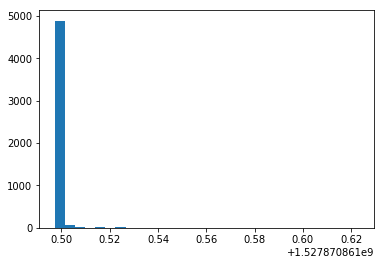

In [85]:
plt.hist(reddit_post_df['post_age_in_seconds'], bins=30)

In [81]:
reddit_post_df['time_diff'][0].total_seconds()

1527870861.4998882

In [72]:
reddit_post_df.dtypes

data                             object
kind                             object
title                            object
post_text                        object
up_votes                          int64
view_count                       object
subreddit_subsribers              int64
score                             int64
number_of_comments                int64
18+                                bool
post_category                    object
time_post_created        datetime64[ns]
datetime_now             datetime64[ns]
time_diff               timedelta64[ns]
dtype: object

In [154]:
reddit_post_df.head()

,data,kind,title,post_text,up_votes,view_count,subreddit_subsribers,score,number_of_comments,18+,post_category,time_post_created,datetime_now,time_diff,post_age_in_seconds,discriminator,subreddit
0,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,"Hi, I'm finally creating some rules and other ...","So now that I actually have some free time, I'...",84,None,40750,84,9,False,None,1970-01-01 00:00:01.525053881,2018-06-01 16:34:23.024942,17683 days 16:34:21.499888,1.527871e+09,1,wowthanksimcured
1,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,If physical illness was talked down to like me...,,1741,None,40750,1741,57,False,None,1970-01-01 00:00:01.527774900,2018-06-01 16:34:23.024942,17683 days 16:34:21.497167,1.527871e+09,1,wowthanksimcured
2,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,"Not sure if it’s a repost, but hot damn the ey...",,68,None,40750,68,16,False,None,1970-01-01 00:00:01.527764369,2018-06-01 16:34:23.024942,17683 days 16:34:21.497177,1.527871e+09,1,wowthanksimcured
3,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,"amazing, never thought of this",,160,None,40750,160,23,False,None,1970-01-01 00:00:01.527743753,2018-06-01 16:34:23.024942,17683 days 16:34:21.497198,1.527871e+09,1,wowthanksimcured
4,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,"thank goodness, I'm cured",,1154,None,40750,1154,53,False,None,1970-01-01 00:00:01.527698729,2018-06-01 16:34:23.024942,17683 days 16:34:21.497243,1.527871e+09,1,wowthanksimcured


In [42]:
reddit_post_df['data'][0]

{'approved_at_utc': None,
 'approved_by': None,
 'archived': False,
 'author': 'lostRecords',
 'author_flair_css_class': None,
 'author_flair_template_id': None,
 'author_flair_text': None,
 'banned_at_utc': None,
 'banned_by': None,
 'can_gild': False,
 'can_mod_post': False,
 'clicked': False,
 'contest_mode': False,
 'created': 1525082681.0,
 'created_utc': 1525053881.0,
 'distinguished': 'moderator',
 'domain': 'self.wowthanksimcured',
 'downs': 0,
 'edited': False,
 'gilded': 0,
 'hidden': False,
 'hide_score': False,
 'id': '8fw5v6',
 'is_crosspostable': False,
 'is_reddit_media_domain': False,
 'is_self': True,
 'is_video': False,
 'likes': None,
 'link_flair_css_class': None,
 'link_flair_text': None,
 'locked': False,
 'media': None,
 'media_embed': {},
 'media_only': False,
 'mod_note': None,
 'mod_reason_by': None,
 'mod_reason_title': None,
 'mod_reports': [],
 'name': 't3_8fw5v6',
 'no_follow': False,
 'num_comments': 9,
 'num_crossposts': 0,
 'num_reports': None,
 'over_1

###### Large scrape which I did not end up using

In [23]:
big_post = []
after = None
for i in range(3600):
    print(i)
    if after == None:
        params = {}
    else:
        params = {'after': after}
    url = 'https://www.reddit.com/r/random/.json' 
    res = requests.get(url, params=params, headers=headers)
    if res.status_code == 200:
        the_json = res.json()
        big_post.extend(the_json['data']['children'])
        after = the_json['data']['after']
    else:
        print(res.status_code)
        break
    time.sleep(5)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599


In [24]:
len(set([p['data']['name'] for p in big_post]))

38392

## (Optional) Collect more information

While we only require you to collect four features, there may be other info that you can find on the results page that might be useful. Feel free to write more functions so that you have more interesting and useful data.

##### As you can see below through my list of columns I ended up pulling in a few more than the required.

In [418]:
reddit_post_df.columns

Index(['data', 'kind', 'title', 'post_text', 'up_votes', 'view_count',
       'subreddit_subsribers', 'score', 'number_of_comments', '18+',
       'post_category', 'time_post_created', 'datetime_now', 'time_diff',
       'post_age_in_seconds', 'discriminator', 'subreddit',
       'high_number_comments', 'sports_gaming_subreddit'],
      dtype='object')

In [419]:
## YOUR CODE HERE
reddit_post_df.head()

,data,kind,title,post_text,up_votes,view_count,subreddit_subsribers,score,number_of_comments,18+,post_category,time_post_created,datetime_now,time_diff,post_age_in_seconds,discriminator,subreddit,high_number_comments,sports_gaming_subreddit
0,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,"Hi, I'm finally creating some rules and other ...","So now that I actually have some free time, I'...",84,None,40750,84,9,False,None,1970-01-01 00:00:01.525053881,2018-06-01 16:34:23.024942,17683 days 16:34:21.499888,1.527871e+09,1,wowthanksimcured,1,0
1,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,If physical illness was talked down to like me...,,1741,None,40750,1741,57,False,None,1970-01-01 00:00:01.527774900,2018-06-01 16:34:23.024942,17683 days 16:34:21.497167,1.527871e+09,1,wowthanksimcured,1,0
2,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,"Not sure if it’s a repost, but hot damn the ey...",,68,None,40750,68,16,False,None,1970-01-01 00:00:01.527764369,2018-06-01 16:34:23.024942,17683 days 16:34:21.497177,1.527871e+09,1,wowthanksimcured,1,0
3,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,"amazing, never thought of this",,160,None,40750,160,23,False,None,1970-01-01 00:00:01.527743753,2018-06-01 16:34:23.024942,17683 days 16:34:21.497198,1.527871e+09,1,wowthanksimcured,1,0
4,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,"thank goodness, I'm cured",,1154,None,40750,1154,53,False,None,1970-01-01 00:00:01.527698729,2018-06-01 16:34:23.024942,17683 days 16:34:21.497243,1.527871e+09,1,wowthanksimcured,1,0


### Save your results as a CSV
You may do this regularly while scraping data as well, so that if your scraper stops of your computer crashes, you don't lose all your data.

In [156]:
# Export to csv
reddit_post_df.to_csv('reddit_post.csv', index=False)

## Predicting comments using Random Forests + Another Classifier

#### Load in the the data of scraped results

In [421]:
## YOUR CODE HERE
reddit_post_df.head()

,data,kind,title,post_text,up_votes,view_count,subreddit_subsribers,score,number_of_comments,18+,post_category,time_post_created,datetime_now,time_diff,post_age_in_seconds,discriminator,subreddit,high_number_comments,sports_gaming_subreddit
0,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,"Hi, I'm finally creating some rules and other ...","So now that I actually have some free time, I'...",84,None,40750,84,9,False,None,1970-01-01 00:00:01.525053881,2018-06-01 16:34:23.024942,17683 days 16:34:21.499888,1.527871e+09,1,wowthanksimcured,1,0
1,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,If physical illness was talked down to like me...,,1741,None,40750,1741,57,False,None,1970-01-01 00:00:01.527774900,2018-06-01 16:34:23.024942,17683 days 16:34:21.497167,1.527871e+09,1,wowthanksimcured,1,0
2,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,"Not sure if it’s a repost, but hot damn the ey...",,68,None,40750,68,16,False,None,1970-01-01 00:00:01.527764369,2018-06-01 16:34:23.024942,17683 days 16:34:21.497177,1.527871e+09,1,wowthanksimcured,1,0
3,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,"amazing, never thought of this",,160,None,40750,160,23,False,None,1970-01-01 00:00:01.527743753,2018-06-01 16:34:23.024942,17683 days 16:34:21.497198,1.527871e+09,1,wowthanksimcured,1,0
4,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,"thank goodness, I'm cured",,1154,None,40750,1154,53,False,None,1970-01-01 00:00:01.527698729,2018-06-01 16:34:23.024942,17683 days 16:34:21.497243,1.527871e+09,1,wowthanksimcured,1,0


#### We want to predict a binary variable - whether the number of comments was low or high. Compute the median number of comments and create a new binary variable that is true when the number of comments is high (above the median)

We could also perform Linear Regression (or any regression) to predict the number of comments here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW number of comments.

While performing regression may be better, performing classification may help remove some of the noise of the extremely popular threads. We don't _have_ to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of comment numbers. 

#### Thought experiment: What is the baseline accuracy for this model?

In [320]:
reddit_post_df['high_number_comments'].value_counts(normalize=True)

0    0.517358
1    0.482642
Name: high_number_comments, dtype: float64

Baseline accuracy = 52%

## Model 1, Random Forest Classifier with only one feature

##### Finding the median to include a column which specifies whether a post ecieved more than the average number of comments, then adding that column to the dataframe to be modeled.

In [116]:
reddit_post_df['number_of_comments'].median()

6.0

In [117]:
## YOUR CODE HERE
def conv_to_clss(x):
    if x > 6:
        return 1
    else:
        return 0

In [319]:
reddit_post_df['high_number_comments'] = reddit_post_df['number_of_comments'].apply(lambda x: conv_to_clss(x))

#### Create a Random Forest model to predict High/Low number of comments using Sklearn. Start by ONLY using the subreddit as a feature. 

In [323]:
random_forest_df = reddit_post_df.drop(['discriminator'], axis=1)

In [325]:
random_forest_df_2 = random_forest_df.drop(['data', 'kind', 'title','post_text', 'up_votes', 'view_count'
                     , 'subreddit_subsribers', 'score', 'number_of_comments',
                     '18+', 'post_category', 'time_post_created', 'datetime_now',
                     'time_diff', 'post_age_in_seconds'], axis=1)

In [329]:
random_forest_df_2.head()

,subreddit,high_number_comments
0,wowthanksimcured,1
1,wowthanksimcured,1
2,wowthanksimcured,1
3,wowthanksimcured,1
4,wowthanksimcured,1


In [330]:
rf=RandomForestClassifier()
X = random_forest_df_2['subreddit']
y = random_forest_df_2['high_number_comments']

In [343]:
from sklearn.preprocessing import LabelEncoder

In [344]:
lab = LabelEncoder()

In [370]:
X.value_counts().head(30)

Sat                    54
xbox                   54
AskAnAmerican          54
GCdebatesQT            54
BattlefrontTWO         52
MadeInAbyss            27
JRPG                   27
startups               27
MakingaMurderer        27
PanPorn                27
jesuschristreddit      27
RPClipsGTA             27
lost                   27
Indiemakeupandmore     27
PurpleCoco             27
CollegeBasketball      27
CasualConversation     27
peacecorps             27
wildlifephotography    27
r4r                    27
Wicca                  27
Hardcore               27
imaginarymaps          27
FantasyPL              27
freebies               27
whowouldwin            27
soccerspirits          27
Paladins               27
Warhammer              27
civbattleroyale        27
Name: subreddit, dtype: int64

In [347]:
Xlab = lab.fit_transform(X)

In [356]:
X_train, X_test, y_train, y_test = train_test_split(Xlab.reshape(-1,1), y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3759, 1) (3759,)
(1253, 1) (1253,)


In [357]:
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6727853152434158

## Model 2, Random Forest Classifier using a count vectorizer to create features based on the words in the thread titles 


#### Create a few new variables in your dataframe to represent interesting features of a thread title.
- For example, create a feature that represents whether 'cat' is in the title or whether 'funny' is in the title. 
- Then build a new Random Forest with these features. Do they add any value?
- After creating these variables, use count-vectorizer to create features based on the words in the thread titles.
- Build a new random forest model with subreddit and these new features included.

In [423]:
# want to build a feature which contains a custome list of 'bag of words' to see if certain words in a title help increase comments
from sklearn.feature_extraction.text import CountVectorizer

In [424]:
reddit_post_df.head()

,data,kind,title,post_text,up_votes,view_count,subreddit_subsribers,score,number_of_comments,18+,post_category,time_post_created,datetime_now,time_diff,post_age_in_seconds,discriminator,subreddit,high_number_comments,sports_gaming_subreddit
0,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,"Hi, I'm finally creating some rules and other ...","So now that I actually have some free time, I'...",84,None,40750,84,9,False,None,1970-01-01 00:00:01.525053881,2018-06-01 16:34:23.024942,17683 days 16:34:21.499888,1.527871e+09,1,wowthanksimcured,1,0
1,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,If physical illness was talked down to like me...,,1741,None,40750,1741,57,False,None,1970-01-01 00:00:01.527774900,2018-06-01 16:34:23.024942,17683 days 16:34:21.497167,1.527871e+09,1,wowthanksimcured,1,0
2,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,"Not sure if it’s a repost, but hot damn the ey...",,68,None,40750,68,16,False,None,1970-01-01 00:00:01.527764369,2018-06-01 16:34:23.024942,17683 days 16:34:21.497177,1.527871e+09,1,wowthanksimcured,1,0
3,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,"amazing, never thought of this",,160,None,40750,160,23,False,None,1970-01-01 00:00:01.527743753,2018-06-01 16:34:23.024942,17683 days 16:34:21.497198,1.527871e+09,1,wowthanksimcured,1,0
4,"{'is_crosspostable': False, 'subreddit_id': 't...",t3,"thank goodness, I'm cured",,1154,None,40750,1154,53,False,None,1970-01-01 00:00:01.527698729,2018-06-01 16:34:23.024942,17683 days 16:34:21.497243,1.527871e+09,1,wowthanksimcured,1,0


In [208]:
words_in_title_df = reddit_post_df.drop(['data', 'kind', 'post_text', 'up_votes', 'view_count'
                     , 'subreddit_subsribers', 'score', 'number_of_comments',
                     '18+', 'post_category', 'time_post_created', 'datetime_now',
                     'time_diff', 'post_age_in_seconds'], axis=1)

In [209]:
words_in_title_df.head()

,title,discriminator,subreddit
0,"Hi, I'm finally creating some rules and other ...",1,wowthanksimcured
1,If physical illness was talked down to like me...,1,wowthanksimcured
2,"Not sure if it’s a repost, but hot damn the ey...",1,wowthanksimcured
3,"amazing, never thought of this",1,wowthanksimcured
4,"thank goodness, I'm cured",1,wowthanksimcured


In [211]:
cvec = CountVectorizer()

In [213]:
corpus = words_in_title_df['title']
cvec.fit(corpus)
new_corpus = cvec.transform(corpus)
new_corpus

<5012x10682 sparse matrix of type '<class 'numpy.int64'>'
	with 43007 stored elements in Compressed Sparse Row format>

In [222]:
new_corpus.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [216]:
cvec.get_feature_names()

['00',
 '000',
 '00pm',
 '01',
 '019',
 '02',
 '03',
 '05',
 '07',
 '09',
 '10',
 '100',
 '1000',
 '1000x713',
 '1000x741',
 '100k',
 '1024',
 '103',
 '107',
 '1080p',
 '10th',
 '11',
 '110',
 '115',
 '117',
 '119',
 '119v',
 '12',
 '120',
 '120kg',
 '123',
 '1237',
 '1280x724',
 '1293',
 '12m',
 '12pm',
 '12th',
 '12v',
 '13',
 '1300',
 '13a',
 '13th',
 '14',
 '143kg',
 '145',
 '148',
 '1480',
 '14a',
 '14xx',
 '15',
 '150',
 '1500',
 '1500ft',
 '1500x1895',
 '15pm',
 '16',
 '1600',
 '164',
 '16ish',
 '16th',
 '17',
 '170',
 '1706',
 '1721',
 '174',
 '17th',
 '18',
 '1800',
 '183lbs',
 '1848',
 '185',
 '1850',
 '18m',
 '18th',
 '18z',
 '19',
 '190',
 '1900s',
 '1903',
 '1909',
 '1910',
 '1914',
 '1916',
 '1919',
 '1920',
 '1922',
 '1925',
 '1930',
 '1932',
 '1937',
 '1938',
 '1939',
 '1940',
 '1940s',
 '1941',
 '1943',
 '1944',
 '1945',
 '1946',
 '1948',
 '1950',
 '1950s',
 '1953',
 '1954',
 '1955',
 '1957',
 '1960',
 '1960s',
 '1962',
 '1963',
 '1966',
 '1967',
 '1970s',
 '1971',
 '1

##### Running Model 2

In [452]:
## YOUR CODE HERE
y= reddit_post_df['discriminator']
X= reddit_post_df['subreddit' ]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = 'english',   \
                             ngram_range = (1, 2),
                             max_features = 5000) 

X_train_cvec = vectorizer.fit_transform(X_train)
X_test_cvec = vectorizer.transform(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_cvec, y_train)
rf.score(X_train_cvec, y_train)
rf.score(X_test_cvec, y_test)

0.659217877094972

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy of the model, as well as any other metrics you feel are appropriate. 

In [451]:
print('Cross Val scores: ', cross_val_score(rf, X_train_cvec, y_train, cv=5))

Cross Val scores:  [0.66755319 0.66755319 0.65026596 0.64760638 0.67909454]


##### Attempt to add another feature to my model number 2, turned out not to be as useful as expected so it is commented out and not included.

In [437]:
# def sports_and_gaming(x):
#     if x in ['xbox', 'basketball', 'baseball', 'football', 'soccer']:
#         return 1
#     else:
#         return 0

In [438]:
# reddit_post_df['sports_gaming_subreddit'] = reddit_post_df['subreddit'].apply(lambda x: sports_and_gaming(x))

In [439]:
# rf=RandomForestClassifier()
# X_2 = reddit_post_df['sports_gaming_subreddit']
# y_2 = reddit_post_df['high_number_comments']

In [440]:
# X_train, X_test, y_train, y_test = train_test_split(X_2.reshape(-1, 1), y_2)
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

In [441]:
# 1-y_train.mean()

In [442]:
# rf.score(X_train, y_train)

In [443]:
# rf.fit(X_train, y_train)
# rf.score(X_test, y_test)

## Model 3: Logistic Regression 

#### Repeat the model-building process with a non-tree-based method.

In [362]:
logreg = LogisticRegression()

y = reddit_post_df['discriminator']
X = reddit_post_df['subreddit' ]

In [364]:
lab2 = LabelEncoder()

In [365]:
Xlab2 = lab2.fit_transform(X)

In [367]:
logreg.fit(Xlab2.reshape(-1,1), y)
logreg.score(Xlab2.reshape(-1,1), y)

0.5255387071029529

In [368]:
## YOUR CODE HERE, run a logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.5203511572226656

## Model 4: Using Tfidf Vectorizer to then run through a random forest 

#### Use Count Vectorizer from scikit-learn to create features from the thread titles. 
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

##### Within model two I used count vectorizer from scikit-learn so in this section I implemented a Tfidf Vectorizer to see if that would help the model score. It turned out they scored exaclty the same, so therefore the Tfidf was not helpfull.

In [412]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words='english')
reddit_post_tvec = tvec.fit_transform(reddit_post_df['subreddit'])

In [414]:
tvec.

<bound method CountVectorizer.get_feature_names of TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)>

In [427]:
TfidVec_df = pd.DataFrame(reddit_post_tvec.todense(), columns=tvec.get_feature_names())

In [432]:
reddit_post_df['discriminator'].mean()

0.4826416600159617

In [430]:
TfidVec_df.shape

(5012, 186)

In [435]:
## YOUR CODE HERE
y= reddit_post_df['discriminator']
X= TfidVec_df

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# X_train_tvec = tvec.fit_transform(X_train)
# X_test_tvec = tvec.transform(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.6956637403564778
0.659217877094972


# Executive Summary
---
Put your executive summary in a Markdown cell below.

Please See the executive summary within its own file entitled: Executive Summary.txt

### BONUS
Refer to the README for the bonus parts

In [ ]:
## YOUR CODE HERE